# Reading in the Data and Relevant Libraries

In [55]:
# URL for the dataset: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

import pandas as pd
cancer = pd.read_csv('breastcancer.csv')
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

# Introduction to the Data

This is a 1995 dataset of 569 anonymized female patients that underwent breast tissue biopsy using Fine-needle aspiration (FNA). In this technique a thin, hollow needle is inserted into the mass for sampling of cells that are examined under a microscope after being stained. The columns in this dataset describe the characteristics of cell nuclei from a digitized image of the mass from the FNA tissue sample. The dataset includes a diagnosis feature indicating whether or not the sample was found to be benign or malignant. In total each patient has 30 features associated with their unique ID.

The data contains records for 10 physical features of the samples, grouped into 3 categories: 
    1. "Mean" 
    2. "Standard error (SE)"
    3. "Worst" - (mean of three largest values per feature)
    
The physical features of the nuclei recorded for the dataset are as follows:
    1. radius (mean of distances from center to points on the perimeter)
    2. texture (standard deviation of gray-scale values)
    3. perimeter
    4. area
    5. smoothness (local variation in radius lengths)
    6. compactness (perimeter^2 / area - 1.0)
    7. concavity (severity of concave portions of the contour)
    8. concave points (number of concave portions of the contour)
    9. symmetry
    10. fractal dimension ("coastline approximation" - 1)
    
The attribute features in the dataset are as follows:
    1. ID number (anonymized)
    2. Diagnosis - either 'M' or 'B for 'Benign' or 'Malignant'
    
All data values are reported to 4 significant digits, and there are no missing values. The class distribution is 357 benign, 212 malignant.
    

# Preprocessing and Exploratory Data Analysis (EDA)

In [2]:
# This dataframe contains 32 columns, but Pandas limits the default display to 20 columns. This removes that limit.

pd.set_option('max_columns', None)

In [3]:
# Now all of the columns in the data can be viewed by scrolling to the right.

cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


By observing all 32 columns, we notice that there are 2 we ought to drop from the dataframe. The first is the 'id' column, because these values don't tell us anything instructive about the data. The next is the 'Unnamed 32' column. All of its values show up as NaN which will not be useful to us.

In [4]:
cancer = cancer.drop(['id', 'Unnamed: 32'], axis=1)

In [5]:
# 'id' and 'Unnamed: 32' are now gone.

cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Exploring Correlation

As explained in the introduction, the feature sets repeat themselves. The features 'radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity', 'concave points', 'symmetry', and 'fractal dimension' are recorded three times. One set reports their mean values, one set reports their standard error, and one set reports their worst values. Below, we've grouped them into those respective categories and generated a clustermap to view potential correlation between the features.

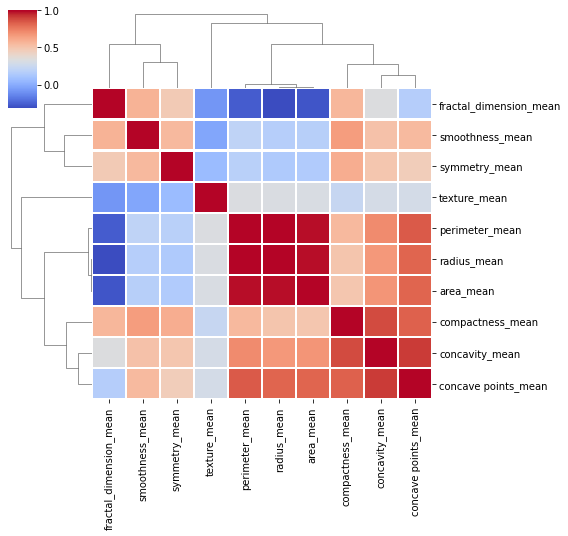

In [6]:
# Clustermap showing correlation for the 'mean' values of the features.

sns.clustermap(cancer[['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean']].corr(), cmap='coolwarm', linewidths=1.2, figsize=(8,7.5));

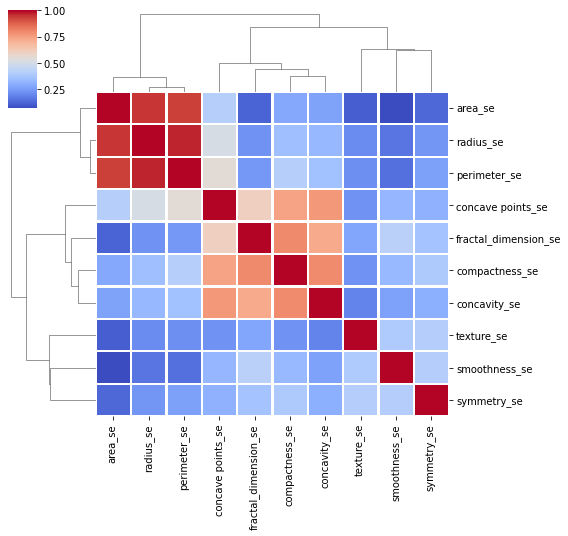

In [7]:
# Clustermap showing correlation for the 'standard error (se)' values of the features.


sns.clustermap(cancer[['radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se']].corr(), cmap='coolwarm', linewidths=1.2, figsize=(8,7.5));

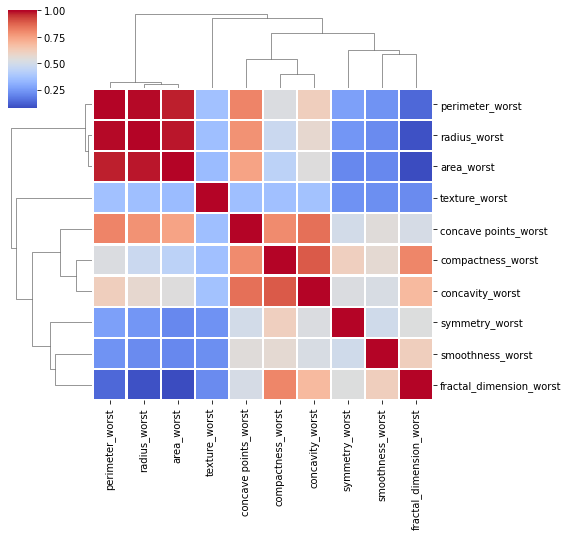

In [8]:
# Clustermap showing correlation for the 'worst' values of the features.


sns.clustermap(cancer[['radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst']].corr(), cmap='coolwarm', linewidths=1.2, figsize=(8,7.5));

Within each feature classification, it looks like 'perimeter', 'radius', and 'area' are clearly correlated with one antoher. To a lesser extent, it appears 'concave points', 'compactness', 'concavity', and 'fractal dimension' are also correlated with one another. And overall, it looks like there is much more correlation between the features when observing their mean values.

### Descriptive Statistics 

The descriptive statistics below are broken out by each feature category.

#### Mean 

In [9]:
cancer[['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean']].describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


#### Standard Error 

In [10]:
cancer[['radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se']].describe()

,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795
std,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646
min,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895
25%,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248
50%,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187
75%,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558
max,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840


#### Worst 

In [11]:
cancer[['radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst']].describe()

,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


There is some interesting variance here, specifically between 'mean' and 'worst' that could be interesting to investigate, so I'm going to create a new copy dataset that I can scale down and use to visualize the difference between the 'mean' and 'worst' values.

In [12]:
cancer_copy = cancer.copy()

In [13]:
# Showing 'head' just to make sure our unneccesary columns are still gone, and dropping 'diagnosis' column.

cancer_copy = cancer_copy.drop(['diagnosis'], axis=1)
cancer_copy.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Looking at Variance between "Mean" and "Worst"

If we were to visualize these difference without applying a scaling transformation to the data, then the features with the greatest scale would distort the plot and potentially obscure variances between 'means' and 'worst' that could be occuring in smaller scaled features. Below we applied a MinMaxScaler show the spread of all values across the same range.

In [14]:
scaler = MinMaxScaler()
scaler.fit_transform(cancer_copy)

# Using a Scaler transforms the data into a NumPy array, so the line below is used to convert back to Pandas dataframe
cancer_copy = pd.DataFrame(scaler.transform(cancer_copy), columns=cancer_copy.columns)

In [15]:
cancer_copy.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,0.356147,0.120469,0.369034,0.273811,0.159296,0.351398,0.135682,0.300625,0.311645,0.183042,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,0.156437,0.082589,0.124440,0.125660,0.119387,0.081323,0.046970,0.253836,0.084539,0.091110,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,0.229622,0.094303,0.180370,0.162922,0.150831,0.283955,0.096768,0.389847,0.205690,0.127006,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,0.139091,0.175875,0.126655,0.038155,0.251453,0.543215,0.142955,0.353665,0.728148,0.287205,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,0.233822,0.093065,0.220563,0.163688,0.332359,0.167918,0.143636,0.357075,0.136179,0.145800,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


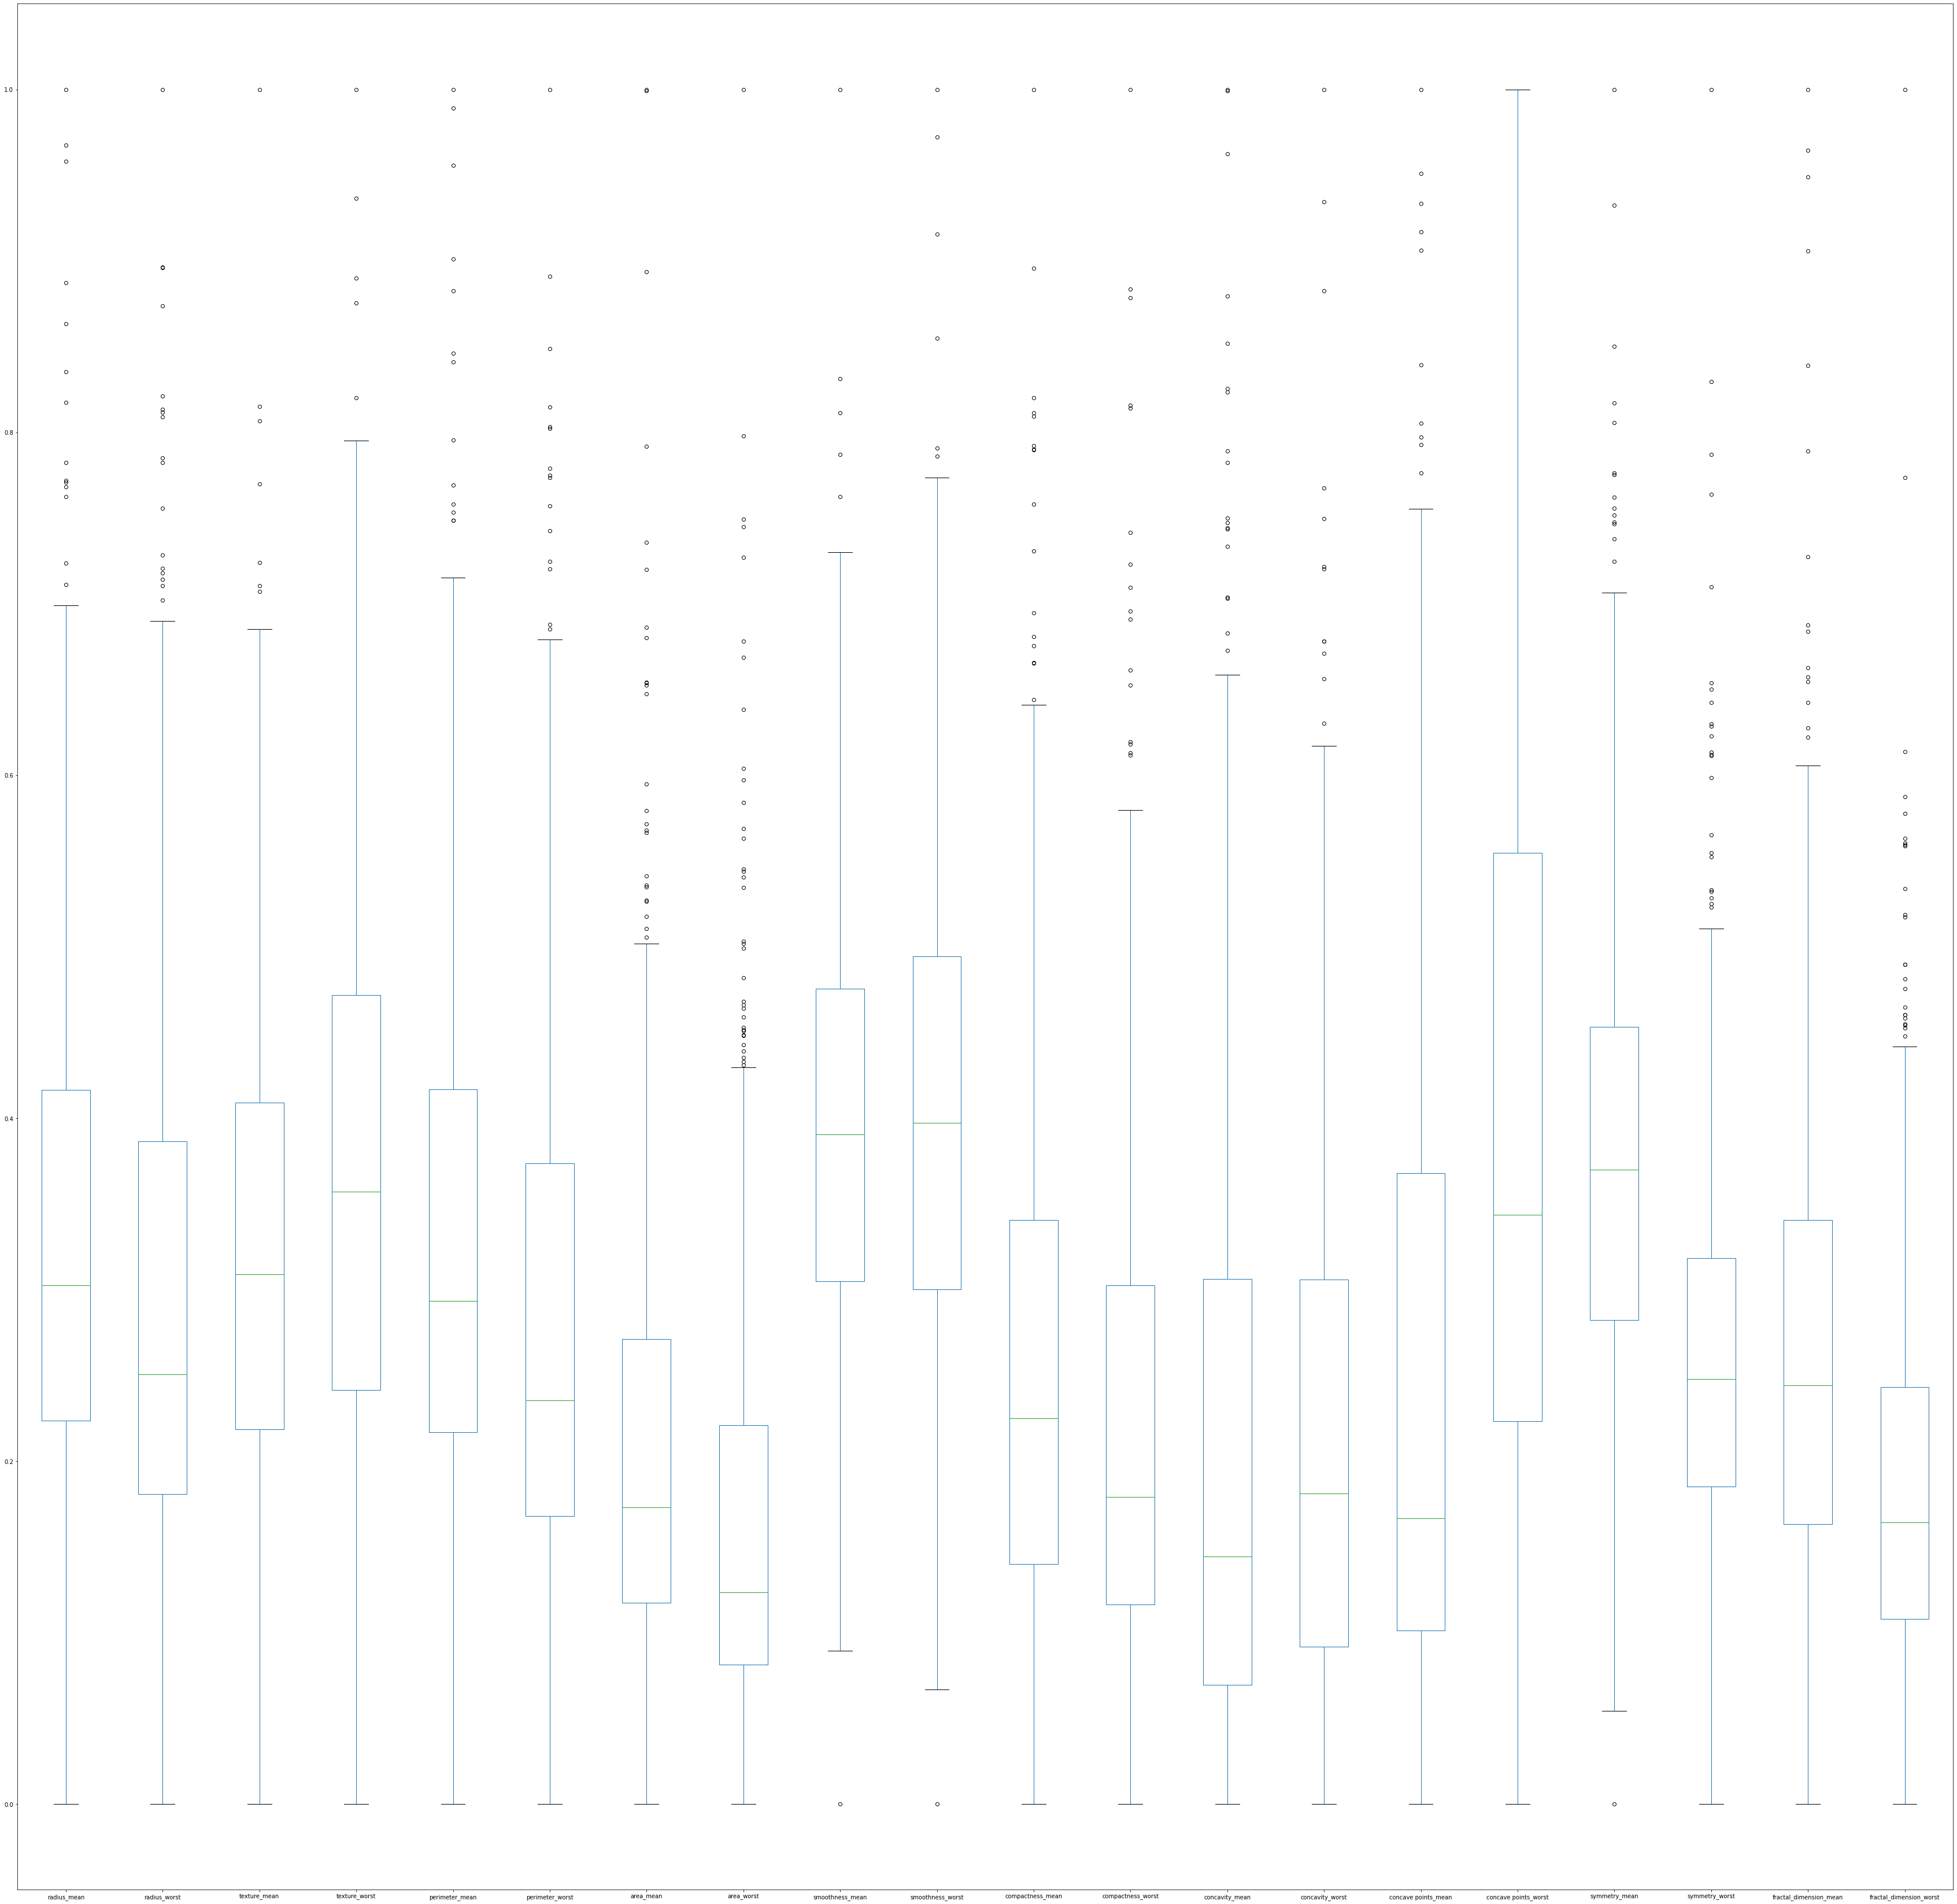

In [16]:
cancer_copy[['radius_mean','radius_worst','texture_mean','texture_worst','perimeter_mean','perimeter_worst','area_mean','area_worst','smoothness_mean','smoothness_worst','compactness_mean','compactness_worst','concavity_mean','concavity_worst','concave points_mean','concave points_worst','symmetry_mean','symmetry_worst','fractal_dimension_mean','fractal_dimension_worst']].plot(kind='box', figsize=(60,60));

While this exercise provided a good opportunity to observe the differences between 'mean' features and 'worst' features, it turns out that the differences are not very significant. The only potential exception may be the 'concave_points' feature, which we can investigate later if desired.

# Building a Predictive Model - Logistic Regression

In [17]:
cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [18]:
# Defining X and y and introducing the train_test_split function, with a training sample size of 75% of the data.

X = cancer.drop('diagnosis', axis=1).copy()

# We break off the 'diagnosis' column, as this is going to be our target variable.

y = cancer['diagnosis'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=99)

In [19]:
# Our X_train is everything but the target variable, and now down to 426 rows.

X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
452,12.000,28.23,76.77,442.5,0.08437,0.06450,0.040550,0.019450,0.1615,0.06104,0.1912,1.7050,1.516,13.86,0.007334,0.02589,0.029410,0.009166,0.01745,0.004302,13.09,37.88,85.07,523.7,0.12080,0.1856,0.18110,0.07116,0.2447,0.08194
420,11.570,19.04,74.20,409.7,0.08546,0.07722,0.054850,0.014280,0.2031,0.06267,0.2864,1.4400,2.206,20.30,0.007278,0.02047,0.044470,0.008799,0.01868,0.003339,13.07,26.98,86.43,520.5,0.12490,0.1937,0.25600,0.06664,0.3035,0.08284
177,16.460,20.11,109.30,832.9,0.09831,0.15560,0.179300,0.088660,0.1794,0.06323,0.3037,1.2840,2.482,31.59,0.006627,0.04094,0.053710,0.018130,0.01682,0.004584,17.79,28.45,123.50,981.2,0.14150,0.4667,0.58620,0.20350,0.3054,0.09519
494,13.160,20.54,84.06,538.7,0.07335,0.05275,0.018000,0.012560,0.1713,0.05888,0.3237,1.4730,2.326,26.07,0.007802,0.02052,0.013410,0.005564,0.02086,0.002701,14.50,28.46,95.29,648.3,0.11180,0.1646,0.07698,0.04195,0.2687,0.07429
470,9.667,18.49,61.49,289.1,0.08946,0.06258,0.029480,0.015140,0.2238,0.06413,0.3776,1.3500,2.569,22.73,0.007501,0.01989,0.027140,0.009883,0.01960,0.003913,11.14,25.62,70.88,385.2,0.12340,0.1542,0.12770,0.06560,0.3174,0.08524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,18.080,21.84,117.40,1024.0,0.07371,0.08642,0.110300,0.057780,0.1770,0.05340,0.6362,1.3050,4.312,76.36,0.005530,0.05296,0.061100,0.014440,0.02140,0.005036,19.76,24.70,129.10,1228.0,0.08822,0.1963,0.25350,0.09181,0.2369,0.06558
68,9.029,17.33,58.79,250.5,0.10660,0.14130,0.313000,0.043750,0.2111,0.08046,0.3274,1.1940,1.885,17.67,0.009549,0.08606,0.303800,0.033220,0.04197,0.009559,10.31,22.65,65.50,324.7,0.14820,0.4365,1.25200,0.17500,0.4228,0.11750
168,17.470,24.68,116.10,984.6,0.10490,0.16030,0.215900,0.104300,0.1538,0.06365,1.0880,1.4100,7.337,122.30,0.006174,0.03634,0.046440,0.015690,0.01145,0.005120,23.14,32.33,155.30,1660.0,0.13760,0.3830,0.48900,0.17210,0.2160,0.09300
185,10.080,15.11,63.76,317.5,0.09267,0.04695,0.001597,0.002404,0.1703,0.06048,0.4245,1.2680,2.680,26.43,0.014390,0.01200,0.001597,0.002404,0.02538,0.003470,11.87,21.18,75.39,437.0,0.15210,0.1019,0.00692,0.01042,0.2933,0.07697


In [20]:
# Our target variable is now a one-dimensional array.

y_train

452    B
420    B
177    M
494    B
470    B
      ..
197    M
68     B
168    M
185    B
35     M
Name: diagnosis, Length: 426, dtype: object

### Scaling the Training Set 

In [21]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [22]:
# Again, as we experienced with the MinMax Scaler transformation above, we want to convert our data back from an array and keep our column names.

X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

In [23]:
# As we can now observe below, the training set has been scaled appropriately for use.

X_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.645670,2.017782,-0.668232,-0.640950,-0.871060,-0.793564,-0.647519,-0.799630,-0.747154,-0.270881,-0.762728,0.879094,-0.663419,-0.569795,0.086058,-0.005987,-0.109123,-0.468973,-0.397344,0.201630,-0.688391,1.942460,-0.693597,-0.651265,-0.524893,-0.470913,-0.471370,-0.697851,-0.763542,-0.141083
1,-0.766696,-0.074201,-0.773180,-0.733346,-0.795147,-0.554908,-0.467404,-0.932148,0.764055,-0.037264,-0.433106,0.405001,-0.336830,-0.438224,0.067779,-0.317624,0.445465,-0.531329,-0.253231,-0.197383,-0.692461,0.197563,-0.653749,-0.656757,-0.349382,-0.420829,-0.118593,-0.765757,0.182559,-0.092175
2,0.609615,0.169370,0.660150,0.458785,0.099794,0.915675,1.100102,0.974375,-0.096898,0.042997,-0.373206,0.125912,-0.206195,-0.207567,-0.144716,0.859353,0.785731,1.054083,-0.471158,0.318475,0.268133,0.432884,0.432405,0.133990,0.361225,1.267195,1.436640,1.290348,0.213130,0.578959
3,-0.319183,0.267254,-0.370541,-0.369960,-1.638550,-1.014020,-0.931547,-0.976236,-0.391148,-0.580459,-0.303957,0.464039,-0.280032,-0.320342,0.238820,-0.314749,-0.698327,-1.080982,0.002189,-0.461735,-0.401434,0.434484,-0.394150,-0.437401,-0.910161,-0.600761,-0.961772,-1.136686,-0.377378,-0.556806
4,-1.302303,-0.199401,-1.292200,-1.073070,-0.516566,-0.829588,-0.786951,-0.910105,1.516027,0.171988,-0.117332,0.243988,-0.165017,-0.388579,0.140570,-0.350973,-0.192716,-0.347149,-0.145439,0.040450,-1.085246,-0.020149,-1.109365,-0.888986,-0.413593,-0.665067,-0.722882,-0.781382,0.406212,0.038248


###  Instantiating and Fitting the Logistic Regression Model

In [24]:
logregmodel = LogisticRegression()
logregmodel.fit(X_train, y_train)

LogisticRegression()

Our logistic regression model has now been trained on our training set. Now we will use the .score function on our test set to evaluate the model's accuracy. It is worth recalling that we used 75% of our data to train the model, to test it on the remaining 25%. Different training/testing percentages can be used to evaluate how well the model learns on smaller or larger samples.

In [25]:
logregmodel.score(X_test, y_test)*100

97.9020979020979

### Evaluation of the Logistic Regression Model 

Before we do this, we must convert the 'object' values in the target column into numeric values that our K-fold cross validation function can work with. We've defined 'M' or "Malignant" as 1, and 'B' or "Benign" as 0. We're doing this for both y_test, y_train, and the original 'diagnosis' column so that we can evaluate whether the model is tending to overfit or under fit.

In [26]:
kfold_cancer_y_test = y_test.copy()
kfold_cancer_y_test = kfold_cancer_y_test.replace({'M': '1', 'B': '0'})
kfold_cancer_y_test.astype(float)

427    0.0
556    0.0
358    0.0
287    0.0
378    0.0
      ... 
549    0.0
481    0.0
546    0.0
384    0.0
125    0.0
Name: diagnosis, Length: 143, dtype: float64

In [27]:
kfold_cancer_y_train = y_train.copy()
kfold_cancer_y_train = kfold_cancer_y_train.replace({'M': '1', 'B': '0'})
kfold_cancer_y_train.astype(float)

452    0.0
420    0.0
177    1.0
494    0.0
470    0.0
      ... 
197    1.0
68     0.0
168    1.0
185    0.0
35     1.0
Name: diagnosis, Length: 426, dtype: float64

In [28]:
kfold_cancer_y_original = cancer['diagnosis'].copy()
kfold_cancer_y_original = kfold_cancer_y_original.replace({'M': '1', 'B': '0'})
kfold_cancer_y_original.astype(float)

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
564    1.0
565    1.0
566    1.0
567    1.0
568    0.0
Name: diagnosis, Length: 569, dtype: float64

## 10-Fold Cross Validation Score of the Logistic Regression Model 

### On Testing Set 

In [29]:
from sklearn.exceptions import ConvergenceWarning
from warnings import filterwarnings
filterwarnings('ignore')

# Introducing our K-Fold (k=10) Cross-Validation function.

kf = model_selection.KFold(n_splits=10, shuffle=True, random_state=123)

# Setting X and Y
X = X_test.copy()
y = kfold_cancer_y_test

# Generating the scores that tell us about the accuracy of our model.

print('Cross Validated MSE:', np.mean(-cross_val_score(logregmodel, X, y, cv=kf, scoring='neg_mean_squared_error')))
print('Cross Validated RMSE:', np.sqrt(np.mean(-cross_val_score(logregmodel, X, y, cv=kf, scoring='neg_mean_squared_error'))))
print('Cross Validated R-squared:', np.mean(cross_val_score(logregmodel, X, y, cv=kf)))

Cross Validated MSE: 0.02095238095238095
Cross Validated RMSE: 0.14474937289114917
Cross Validated R-squared: 0.9790476190476192


### On Training Set 

In [30]:
from sklearn.exceptions import ConvergenceWarning
from warnings import filterwarnings
filterwarnings('ignore')

# Introducing our K-Fold (k=10) Cross-Validation function.

kf = model_selection.KFold(n_splits=10, shuffle=True, random_state=123)

# Setting X and Y
X = X_train.copy()
y = kfold_cancer_y_train

# Generating the scores that tell us about the accuracy of our model.

print('Cross Validated MSE:', np.mean(-cross_val_score(logregmodel, X, y, cv=kf, scoring='neg_mean_squared_error')))
print('Cross Validated RMSE:', np.sqrt(np.mean(-cross_val_score(logregmodel, X, y, cv=kf, scoring='neg_mean_squared_error'))))
print('Cross Validated R-squared:', np.mean(cross_val_score(logregmodel, X, y, cv=kf)))

Cross Validated MSE: 0.030454042081949063
Cross Validated RMSE: 0.17451086522606282
Cross Validated R-squared: 0.969545957918051


### On the Entire Dataset 

In [31]:
from sklearn.exceptions import ConvergenceWarning
from warnings import filterwarnings
filterwarnings('ignore')

# Introducing our K-Fold (k=10) Cross-Validation function.

kf = model_selection.KFold(n_splits=10, shuffle=True, random_state=123)

# Setting X and Y
X = cancer.drop('diagnosis', axis=1).copy()
y = kfold_cancer_y_original

# Generating the scores that tell us about the accuracy of our model.

print('Cross Validated MSE:', np.mean(-cross_val_score(logregmodel, X, y, cv=kf, scoring='neg_mean_squared_error')))
print('Cross Validated RMSE:', np.sqrt(np.mean(-cross_val_score(logregmodel, X, y, cv=kf, scoring='neg_mean_squared_error'))))
print('Cross Validated R-squared:', np.mean(cross_val_score(logregmodel, X, y, cv=kf)))

Cross Validated MSE: 0.05986842105263157
Cross Validated RMSE: 0.24468024246479644
Cross Validated R-squared: 0.9401315789473685


### Key Takeaway of the Logistic Regression Model

The cross-validated RMSE of our testing set is just barely higher than that of the training which suggests that the model slightly underfits the data.

# Classification using RandomForest

First we will instantiate our RandomForestClassifier Model, then define our train and test variables. Similarly to the previous Logistic Regression Model, we will appropriately scale the data and then fit the model to our training data. Finally, we will evaluate the score on the testing data to determine how accurate our model is. Uniquely in this section however, we will use the feature_importances function from sklearn to determine which of our features are the most significatn drivers for a cell being classified as benign or malignant.

In [32]:
RFCmodel = RandomForestClassifier(n_estimators=25, random_state=99)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=99)

In [33]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [34]:
# Again, as we experienced with the MinMax Scaler transformation above, we want to convert our data back from an array and keep our column names.

X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

In [35]:
# As we can now observe below, the training set has been scaled appropriately for use.

X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.747309,1.202602,-0.760479,-0.701243,-1.518092,-0.926074,-0.900262,-0.954516,0.427697,-0.579610,-0.556709,1.018244,-0.448585,-0.478647,-0.310922,-0.130692,-0.582661,-0.832937,1.265011,-0.650018,-0.809693,0.972438,-0.787366,-0.721447,-1.579034,-0.763905,-0.970821,-1.029343,0.522919,-0.908833
1,-0.389247,2.217651,-0.424497,-0.430633,-1.072328,-0.900363,-0.361478,-0.687895,-0.901413,-0.817525,-0.691217,0.265970,-0.661580,-0.506137,0.419675,-0.235764,0.252123,-0.726313,-0.457108,-0.410994,-0.517093,1.631696,-0.570574,-0.519765,-0.430885,-0.599752,-0.151477,-0.775305,-0.855811,-0.639670
2,-0.313718,-0.893943,-0.310336,-0.362075,-0.206212,-0.394825,0.033961,-0.392801,0.020679,-0.119175,-0.489454,-0.735827,-0.514478,-0.387415,0.474550,-0.313426,-0.056479,-0.397870,0.776751,-0.136318,-0.339515,-0.806916,-0.313625,-0.381700,0.626676,-0.196661,0.120825,-0.286456,1.479492,0.113663
3,1.647233,0.095901,1.549960,1.686593,-1.143073,-0.382347,0.322052,0.705521,0.402483,-1.674018,0.602577,-0.923719,0.436342,0.649608,-0.816916,-0.679464,-0.202258,0.105080,0.115017,-0.902007,1.333351,-0.402081,1.214976,1.275918,-1.159801,-0.652357,-0.071697,0.399053,0.224089,-1.348593
4,1.725559,0.581658,1.659652,1.739544,-0.366934,0.136803,0.098549,0.720793,-0.714113,-1.028849,0.553665,-0.516678,0.598757,0.601601,-0.283485,-0.376812,-0.300169,0.471921,-0.744319,-0.773582,1.585593,0.132365,1.535072,1.484029,-0.009546,-0.120605,-0.025836,0.913791,-0.481087,-0.914249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,1.065382,0.595406,0.993374,0.989862,-1.588838,-0.367600,0.255678,0.201271,-0.166621,-1.332541,0.751012,0.168845,0.642376,0.679687,-0.499792,1.559022,1.054270,0.442780,0.054128,0.494464,0.667434,-0.134858,0.600975,0.550065,-1.883662,-0.382362,-0.105616,-0.368359,-0.860554,-1.010108
394,-1.466511,-0.437973,-1.387755,-1.165823,0.670207,0.669943,2.843011,-0.161902,1.061636,2.454502,-0.297882,-0.027170,-0.483852,-0.489404,0.782422,3.449171,9.855404,3.662069,2.417302,2.326852,-1.239512,-0.462886,-1.249758,-0.978287,0.643530,1.140008,4.664458,0.891082,2.078734,1.801756
395,0.894743,1.246137,0.940560,0.880057,0.553443,1.029151,1.603593,1.405465,-1.002267,0.101945,2.285631,0.354265,2.046101,1.594801,-0.294332,0.609949,0.522648,0.657056,-1.088973,0.528495,1.349495,1.086048,1.363384,1.280993,0.196910,0.800929,1.019424,0.847177,-1.191007,0.474894
396,-1.172508,-0.946643,-1.185840,-0.979099,-0.286573,-1.113808,-1.131845,-1.232164,-0.407950,-0.341696,0.031936,0.103507,-0.114939,-0.314907,2.326885,-0.779968,-1.103512,-1.620446,0.511368,-0.139964,-0.924715,-0.698107,-0.961963,-0.788280,0.807852,-0.980662,-1.283587,-1.600549,0.031193,-0.393252


In [36]:
# Fit the model on our training data

RFCmodel.fit(X_train, y_train)

RandomForestClassifier(n_estimators=25, random_state=99)

In [37]:
# Score the model on our testing data

RFCmodel.score(X_test, y_test)*100

95.90643274853801

Below is another way to show the model's accuracy, but sets up a the parameters for confusion matrix to see the counts of correct vs. incorrect classifications of our target variable.

In [38]:
prediction = RFCmodel.predict(X_test)
metrics.accuracy_score(y_test, prediction)

0.9590643274853801

In [39]:
RFC_confusion_matrix = confusion_matrix(y_test, prediction)
print(RFC_confusion_matrix)

# The confusion matrix below shows our model correctly classified 112/118 tumors as benign, and 52/53 as malignant.

[[112   1]
 [  6  52]]


In [40]:
# Using feature_importance to get the relative weight of each feature and sort them.

feature_importance = pd.Series(RFCmodel.feature_importances_, index=X.columns).sort_values(ascending=True)
feature_importance = ((feature_importance)*100)

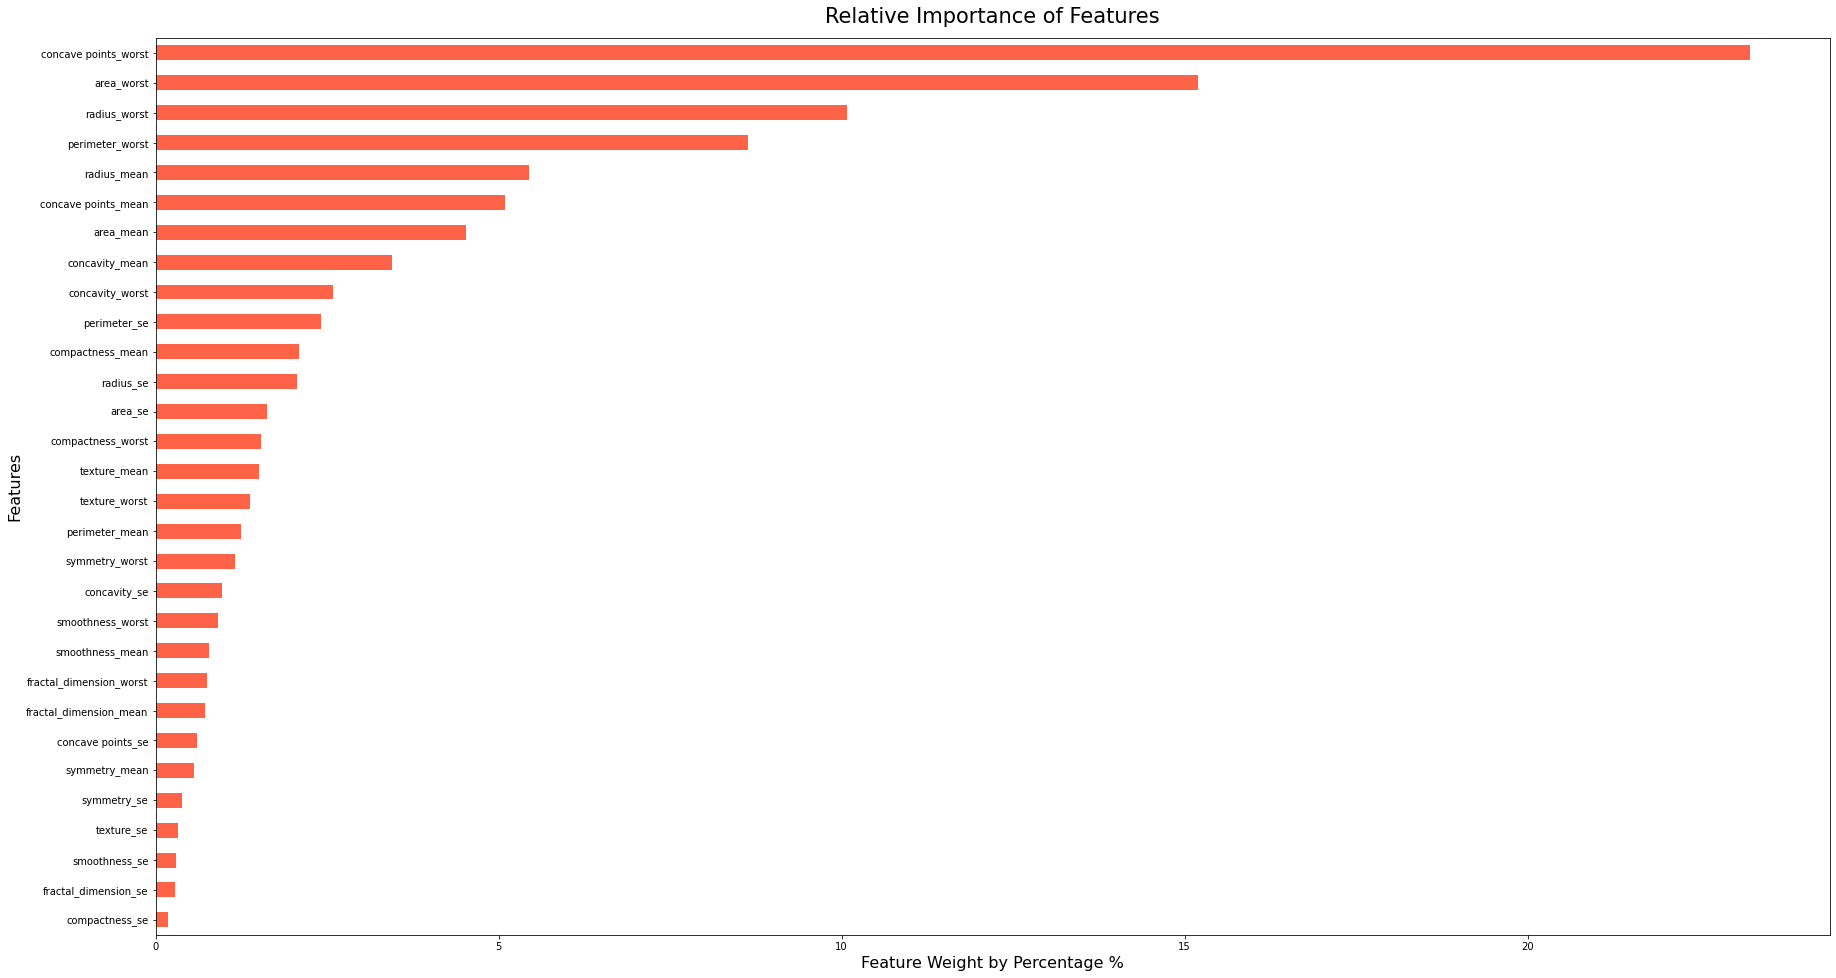

In [41]:
feature_importance.plot(kind='barh', figsize=(30,16.5), color='tomato');

plt.title('Relative Importance of Features', fontsize=21, y=1.01)
plt.xlabel('Feature Weight by Percentage %', fontsize=16)
plt.ylabel('Features', fontsize=16);

### Key Takeway from the RandomForestClassifier Model 

Somewhat unsurprisingly, the features from the 'worst' column set are the strongest drivers in determining whether the cell is part of a malignant or benign tumor. More spefically, it suggests that shape and size play a more significant role in that determination that other factors like texture or density. It is especially important to note the weight of the 'concave_points' feature coming in first. I identified this feature in my exploratory data analysis (EDA) as being a potential cause for concern due to its dramatic difference from 'mean' counterpart.

# Principal Component Analysis (PCA) and Dimensionality Reduction

In [42]:
# Splitting our data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=99)

In [43]:
# Applying the appropriate Scaler

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [44]:
# Converting the new NumPy arrays back into Pandas DataFrames

X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

In [45]:
# Starting by instantiating and fitting the model using all 30 dimensions or "principal components"

n_components = 30

pca = PCA(n_components=n_components)
pca.fit(X_train)

principalcomponent_train = pd.DataFrame(pca.transform(X_train), columns=["Principal Component " + str(i+1) for i in range(n_components)])
principalcomponent_test = pd.DataFrame(pca.transform(X_test), columns=["Principal Component " + str(i+1) for i in range(n_components)])

In [46]:
# Introducing the PCA function 'explained_variance_ratio_' which weights each feature by its overall influence on the total variance in the dataset

explained_variance = pca.explained_variance_ratio_

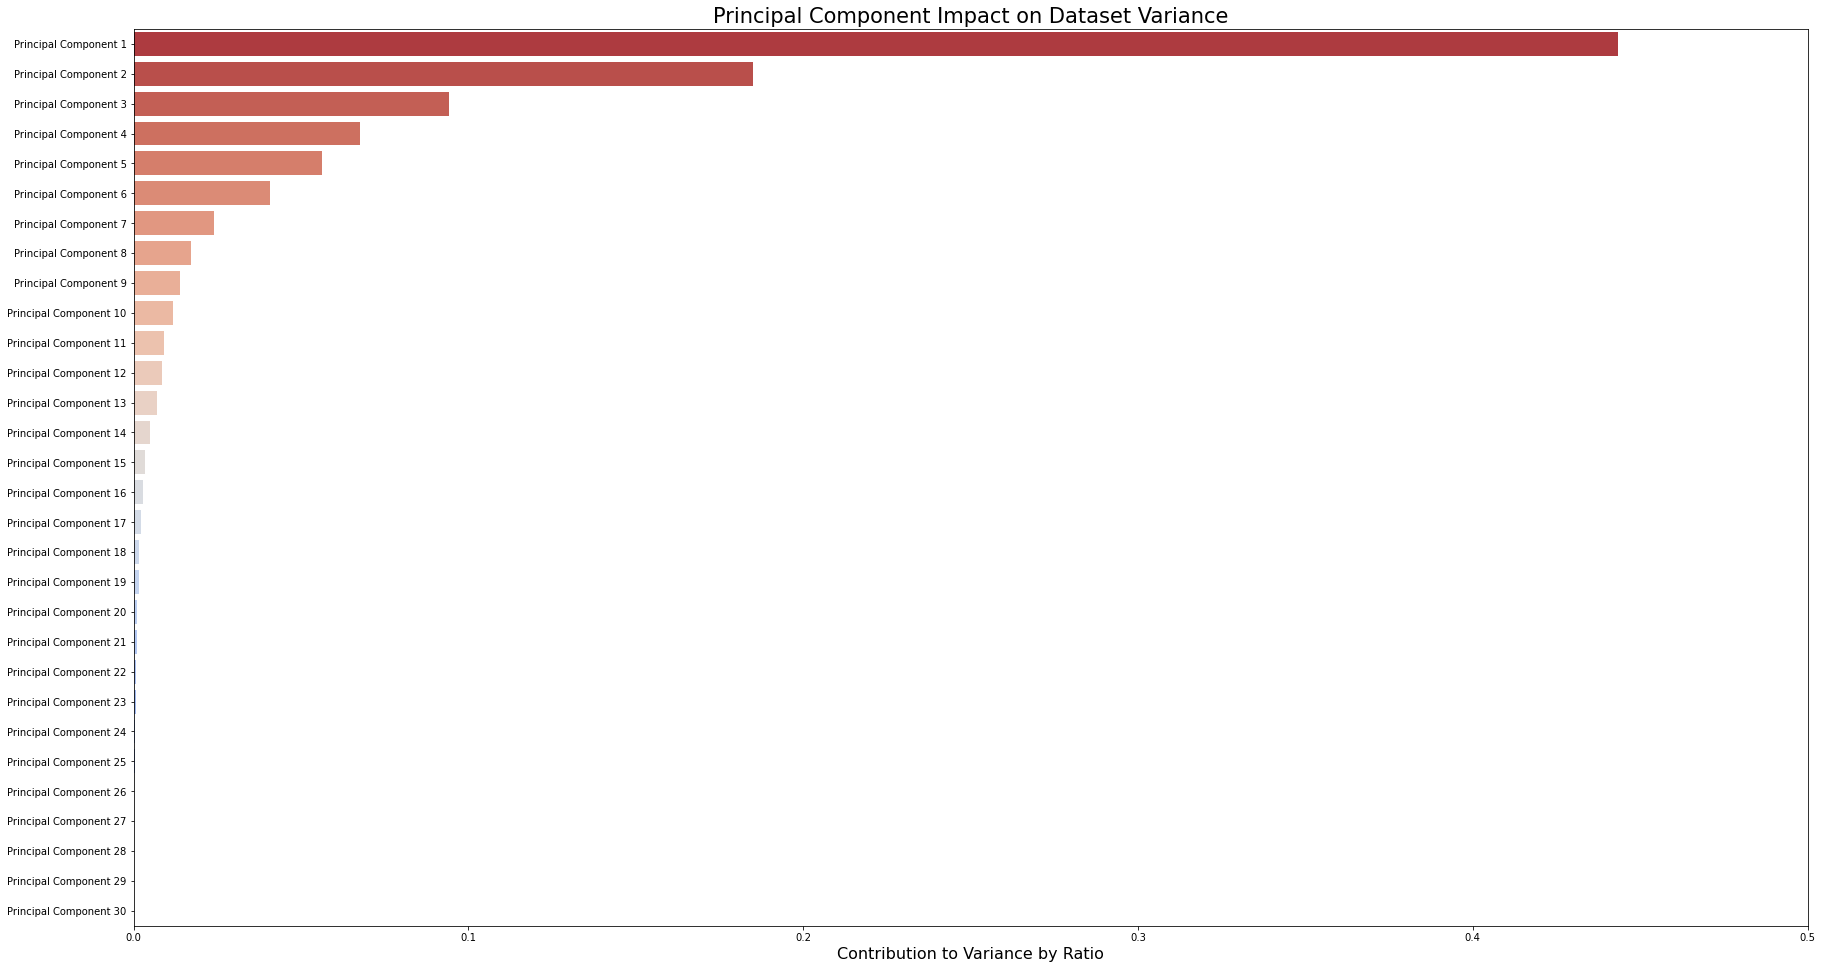

In [47]:
# Plotting the rankings of the features which contribute most to total variance, from greatest to least

plt.figure(figsize=(30,16.5))
sns.barplot(x=pca.explained_variance_ratio_, y=["Principal Component " + str(i+1) for i in range(n_components)], orient='h', palette='coolwarm_r')
plt.xlim(0.0, 0.5)
plt.xlabel("Contribution to Variance by Ratio", fontsize=16)
plt.title("Principal Component Impact on Dataset Variance", fontsize=21)
plt.show()


### Applying a Logistic Regression Model to Principal Components 

The purpose of doing this here is to determine how many principal components, or dimensions, the dataset can tolerate having removed before the dimension reduction starts punishing the accuracy of the model. You may recall that the original logistic regression model had an accuracy of 97.9% using all 30 features. However, as indicated above, many of the principal components contribute very little to the variance in the dataset.

In [48]:
# Scoring our PCA Regression model using all 30 dimensions

pca_regression = LogisticRegression()
pca_regression.fit(principalcomponent_train, y_train)

pca_regression.score(principalcomponent_test, y_test)*100

97.36842105263158

This is extremely close! Which is not surprising due to the retention of all the principal components, but see below how the accuracy changes (or doesn't) as we begin to decrease n_components.

### PCA Model Accuracy as n_components is Reduced 

In [49]:
# Dropping number of components down to 20

n_components = 20
pca = PCA(n_components=n_components)
pca.fit(X_train)
principalcomponent_train = pd.DataFrame(pca.transform(X_train), columns=["Principal Component " + str(i+1) for i in range(n_components)])
principalcomponent_test = pd.DataFrame(pca.transform(X_test), columns=["Principal Component " + str(i+1) for i in range(n_components)])
pca_regression = LogisticRegression()
pca_regression.fit(principalcomponent_train, y_train)
pca_regression.score(principalcomponent_test, y_test)*100

97.36842105263158

In [50]:
# Dropping number of components down to 15

n_components = 15
pca = PCA(n_components=n_components)
pca.fit(X_train)
principalcomponent_train = pd.DataFrame(pca.transform(X_train), columns=["Principal Component " + str(i+1) for i in range(n_components)])
principalcomponent_test = pd.DataFrame(pca.transform(X_test), columns=["Principal Component " + str(i+1) for i in range(n_components)])
pca_regression = LogisticRegression()
pca_regression.fit(principalcomponent_train, y_train)
pca_regression.score(principalcomponent_test, y_test)*100

98.24561403508771

In [51]:
# Dropping number of components down to 10

n_components = 10
pca = PCA(n_components=n_components)
pca.fit(X_train)
principalcomponent_train = pd.DataFrame(pca.transform(X_train), columns=["Principal Component " + str(i+1) for i in range(n_components)])
principalcomponent_test = pd.DataFrame(pca.transform(X_test), columns=["Principal Component " + str(i+1) for i in range(n_components)])
pca_regression = LogisticRegression()
pca_regression.fit(principalcomponent_train, y_train)
pca_regression.score(principalcomponent_test, y_test)*100

98.24561403508771

In [52]:
# Dropping number of components down to 5

n_components = 5
pca = PCA(n_components=n_components)
pca.fit(X_train)
principalcomponent_train = pd.DataFrame(pca.transform(X_train), columns=["Principal Component " + str(i+1) for i in range(n_components)])
principalcomponent_test = pd.DataFrame(pca.transform(X_test), columns=["Principal Component " + str(i+1) for i in range(n_components)])
pca_regression = LogisticRegression()
pca_regression.fit(principalcomponent_train, y_train)
pca_regression.score(principalcomponent_test, y_test)*100

97.36842105263158

In [53]:
# Dropping number of components down to 4

n_components = 4
pca = PCA(n_components=n_components)
pca.fit(X_train)
principalcomponent_train = pd.DataFrame(pca.transform(X_train), columns=["Principal Component " + str(i+1) for i in range(n_components)])
principalcomponent_test = pd.DataFrame(pca.transform(X_test), columns=["Principal Component " + str(i+1) for i in range(n_components)])
pca_regression = LogisticRegression()
pca_regression.fit(principalcomponent_train, y_train)
pca_regression.score(principalcomponent_test, y_test)*100

96.49122807017544

In [54]:
# Dropping number of components down to 1

n_components = 1
pca = PCA(n_components=n_components)
pca.fit(X_train)
principalcomponent_train = pd.DataFrame(pca.transform(X_train), columns=["Principal Component " + str(i+1) for i in range(n_components)])
principalcomponent_test = pd.DataFrame(pca.transform(X_test), columns=["Principal Component " + str(i+1) for i in range(n_components)])
pca_regression = LogisticRegression()
pca_regression.fit(principalcomponent_train, y_train)
pca_regression.score(principalcomponent_test, y_test)*100

91.22807017543859

### Key Takeaway from Principal Component Analysis and Dimension Reduction 

In general, analyzing a dataset with 32 features can be cumbersome. It can be especially cumbersome when those feature sets are essentially 3 repeating categories. That's why watching the changes in model accuracy as we reduce n_components is so instructive. The key takeaway from this is that if our standard was, for instance, to achieve an accuracy score of at least 95% on our model, we could reduce our dataset from 30 dimensions to 4 and still achieve a model performance above that accuracy score threshold.